In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

from modelclass import model
model.widescreen()

# Create a Samuleson multiplier accelerator model 

In [2]:
fma   = f'''
gdp = consumption+investment  
consumption = mul * gdp(-1)
investment = acc * (consumption-consumption(-1)) + exo_investment'''
mma = model.from_eq(fma,modelname = 'Accelerator multiplicator model')

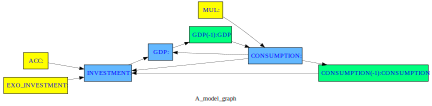

In [3]:
mma.drawmodel()

# A function which generates a dataframe with values

In [4]:
def get_df(mul=0.9,acc=0.5,gdp=1000,im=200,years=100):
    'Creates imput dataframe to accelerator multiplier model '
    df = pd.DataFrame([[gdp]]*years,index=range(2018,2018+years),columns=['GDP'])
    df.loc[:,'MUL']= mul
    df.loc[:,'ACC']= acc
    df.loc[:,'CONSUMPTION']= gdp*mul
    df.loc[:,'EXO_INVESTMENT']= im
    return df
base = get_df()
base.head()

,GDP,MUL,ACC,CONSUMPTION,EXO_INVESTMENT
2018,1000,0.9,0.5,900.0,200
2019,1000,0.9,0.5,900.0,200
2020,1000,0.9,0.5,900.0,200
2021,1000,0.9,0.5,900.0,200
2022,1000,0.9,0.5,900.0,200


# a function to forecast and calculate eigenvalues 

In [5]:
def geteigen(mul,acc,years=30,show=False):
    from copy import copy 
    from modelnewton import newton_diff

    '''Function which creates a Samuelson Multiplier accelerator model, runs it and 
    calculates the eigenvalues for the compaignion matrix in order to evaluate stability'''
    
    first = get_df(mul,acc,years=years)
    base  = mma(first,silent=True)     # Solve the model 
    mma_newton = newton_diff(mma)      # create a newton_diff instance which contains derivatives 
    eig_dic = mma_newton.get_eigenvectors() #  
    mma_newton.eigplot(eig_dic);

    if show:
        _ = mma['gdp consumption investment'].plot(top=0.8,title='Values',colrow=3,sharey=False)  # Show the solution
    return  mma_newton

## Stability   

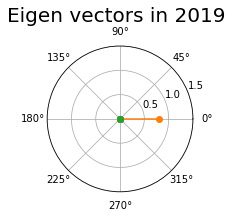

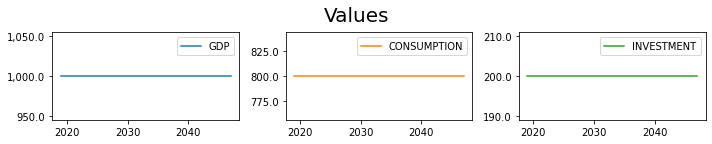

In [6]:
geteigen(mul=0.8,acc=0,show=1);

## Explosion 

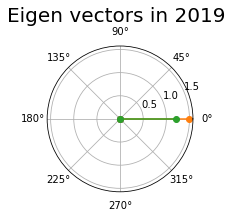

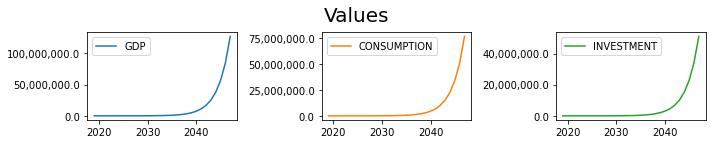

In [7]:
geteigen(mul=0.9,acc=2,show=1);

## Exploding oscillations

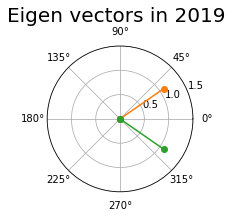

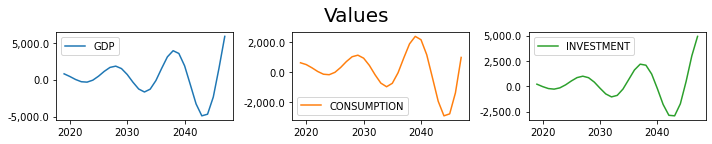

In [8]:
geteigen(mul=0.6,acc=2,show=1);

## Perpetual oscillations 

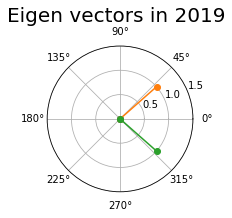

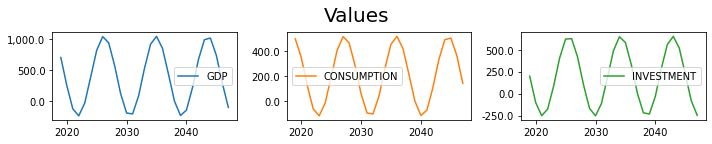

In [9]:
geteigen(mul=0.5,acc=2,show=1);

## Dampened oscillations 

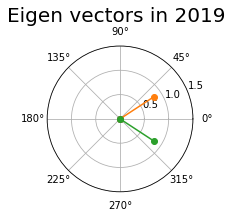

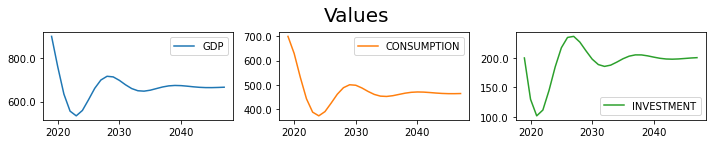

In [10]:
geteigen(mul=0.7,acc=1,show=1);